<a href="https://colab.research.google.com/github/codigoquant/python_para_investimentos/blob/master/27_Rentabilidade_da_Carteira_por_cotas_Considerando_aportes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cálculo de Rentabilidade de Carteira de Ações - Cotização - Python para Investimentos

## Configurações Iniciais

In [ ]:
!pip -q install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18,8)
matplotlib.style.use('seaborn-darkgrid')

## Fazendo o upload do arquivo trades.xlsx

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving trades.xlsx to trades.xlsx
User uploaded file "trades.xlsx" with length 8914 bytes


In [ ]:
arquivo = pd.read_excel('trades.xlsx')
arquivo

,data,ativo,quantidade,preço
0,2020-04-22,vale3,100,43.30
1,2020-04-22,petr4,200,16.25
2,2020-04-22,itsa4,400,9.07
3,2020-04-22,lren3,100,38.99
4,2020-04-22,mglu3,100,52.30
5,2020-05-12,vale3,100,48.52
6,2020-05-12,petr4,200,18.73
7,2020-05-12,itsa4,400,8.43
8,2020-05-12,lren3,200,33.89
9,2020-05-12,mglu3,2000,56.00


## Criando tabelas com os dados do arquivo

### Criando tabela com colunas para cada ativo e indexando por data

In [ ]:
trade_quant = pd.pivot_table(arquivo, values='quantidade', index=['data'], columns=arquivo['ativo'].str.upper(), aggfunc=np.sum, fill_value=0)
trade_quant

ativo,CVCB3,ITSA4,LREN3,MGLU3,PETR4,VALE3
data,,,,,,
2020-04-22,0,400,100,100,200,100
2020-05-12,0,400,200,2000,200,100
2020-05-14,1000,400,200,0,300,0
2020-05-21,0,0,0,-500,0,0


### Criando tabela com os preços de compra e venda

In [ ]:
trade_price = pd.pivot_table(arquivo, values='preço', index=['data'], columns=arquivo['ativo'].str.upper(), fill_value=0)
trade_price


ativo,CVCB3,ITSA4,LREN3,MGLU3,PETR4,VALE3
data,,,,,,
2020-04-22,0.00,9.07,38.99,52.3,16.25,43.30
2020-05-12,0.00,8.43,33.89,56.0,18.73,48.52
2020-05-14,10.08,8.23,32.31,0.0,17.40,0.00
2020-05-21,0.00,0.00,0.00,58.8,0.00,0.00


## Baixando os cotações das ações

In [ ]:
prices = yf.download(tickers=(trade_quant.columns+'.SA').to_list(), start=trade_quant.index[0], rounding=True)['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [ ]:
prices.columns  = prices.columns.str.rstrip('.SA')
prices.dropna(how='all', inplace=True)
prices

,CVCB3,ITSA4,LREN3,MGLU3,PETR4,VALE3
Date,,,,,,
2020-04-22,14.85,8.88,40.84,50.43,16.75,42.90
2020-04-23,13.92,8.77,39.36,49.36,16.95,43.51
2020-04-24,11.99,8.33,37.59,47.27,15.95,43.76
2020-04-27,12.36,8.60,38.58,49.39,16.45,44.55
2020-04-28,14.15,9.20,40.13,51.68,17.25,44.61
...,...,...,...,...,...,...
2020-08-28,19.16,9.76,43.72,94.58,22.54,61.10
2020-08-31,18.30,9.41,43.47,93.22,21.89,59.68
2020-09-01,18.70,9.72,45.47,95.33,22.87,61.76


In [ ]:
trades = trade_quant.reindex(index=prices.index)
trades.fillna(value=0, inplace=True)
trades

ativo,CVCB3,ITSA4,LREN3,MGLU3,PETR4,VALE3
Date,,,,,,
2020-04-22,0.0,400.0,100.0,100.0,200.0,100.0
2020-04-23,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-24,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-27,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-28,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2020-08-28,0.0,0.0,0.0,0.0,0.0,0.0
2020-08-31,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-01,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
aportes = (trades * trade_price).sum(axis=1)
aportes

2020-04-22    20337.0
2020-04-23        0.0
2020-04-24        0.0
2020-04-27        0.0
2020-04-28        0.0
               ...   
2020-08-28        0.0
2020-08-31        0.0
2020-09-01        0.0
2020-09-02        0.0
2020-09-03        0.0
Length: 95, dtype: float64

In [ ]:
posicao = trades.cumsum()
posicao

ativo,CVCB3,ITSA4,LREN3,MGLU3,PETR4,VALE3
Date,,,,,,
2020-04-22,0.0,400.0,100.0,100.0,200.0,100.0
2020-04-23,0.0,400.0,100.0,100.0,200.0,100.0
2020-04-24,0.0,400.0,100.0,100.0,200.0,100.0
2020-04-27,0.0,400.0,100.0,100.0,200.0,100.0
2020-04-28,0.0,400.0,100.0,100.0,200.0,100.0
...,...,...,...,...,...,...
2020-08-28,1000.0,1200.0,500.0,1600.0,700.0,200.0
2020-08-31,1000.0,1200.0,500.0,1600.0,700.0,200.0
2020-09-01,1000.0,1200.0,500.0,1600.0,700.0,200.0


In [ ]:
carteira = posicao * prices
carteira['saldo'] = carteira.sum(axis=1)
carteira

ativo,CVCB3,ITSA4,LREN3,MGLU3,PETR4,VALE3,saldo
Date,,,,,,,
2020-04-22,0.0,3552.0,4084.0,5043.0,3350.0,4290.0,20319.0
2020-04-23,0.0,3508.0,3936.0,4936.0,3390.0,4351.0,20121.0
2020-04-24,0.0,3332.0,3759.0,4727.0,3190.0,4376.0,19384.0
2020-04-27,0.0,3440.0,3858.0,4939.0,3290.0,4455.0,19982.0
2020-04-28,0.0,3680.0,4013.0,5168.0,3450.0,4461.0,20772.0
...,...,...,...,...,...,...,...
2020-08-28,19160.0,11712.0,21860.0,151328.0,15778.0,12220.0,232058.0
2020-08-31,18300.0,11292.0,21735.0,149152.0,15323.0,11936.0,227738.0
2020-09-01,18700.0,11664.0,22735.0,152528.0,16009.0,12352.0,233988.0


In [ ]:
for i, data in enumerate(aportes.index):
  if i == 0:
    carteira.at[data, 'vl_cota'] = 1
    carteira.at[data, 'qtd_cotas'] = carteira.loc[data]['saldo'].copy()
  
  else:
    if aportes[data] != 0:
      carteira.at[data, 'qtd_cotas'] =  carteira.iloc[i-1]['qtd_cotas'] + (aportes[data] / carteira.iloc[i-1]['vl_cota'])
      carteira.at[data, 'vl_cota']   =  carteira.iloc[i]['saldo'] / carteira.at[data, 'qtd_cotas']
      carteira.at[data, 'retorno']   = (carteira.iloc[i]['vl_cota'] / carteira.iloc[i-1]['vl_cota']) -1 
    else:
      carteira.at[data, 'qtd_cotas'] = carteira.iloc[i-1]['qtd_cotas']
      carteira.at[data, 'vl_cota']   = carteira.iloc[i]['saldo'] / carteira.at[data, 'qtd_cotas']
      carteira.at[data, 'retorno']   = (carteira.iloc[i]['vl_cota'] / carteira.iloc[i-1]['vl_cota']) -1 


In [ ]:
carteira.head(50)

ativo,CVCB3,ITSA4,LREN3,MGLU3,PETR4,VALE3,saldo,vl_cota,qtd_cotas,retorno
Date,,,,,,,,,,
2020-04-22,0.0,3552.0,4084.0,5043.0,3350.0,4290.0,20319.0,1.000000,20319.000000,NaN
2020-04-23,0.0,3508.0,3936.0,4936.0,3390.0,4351.0,20121.0,0.990255,20319.000000,-0.009745
2020-04-24,0.0,3332.0,3759.0,4727.0,3190.0,4376.0,19384.0,0.953984,20319.000000,-0.036628
2020-04-27,0.0,3440.0,3858.0,4939.0,3290.0,4455.0,19982.0,0.983415,20319.000000,0.030850
2020-04-28,0.0,3680.0,4013.0,5168.0,3450.0,4461.0,20772.0,1.022294,20319.000000,0.039536
2020-04-29,0.0,3672.0,4048.0,5050.0,3640.0,4673.0,21083.0,1.037600,20319.000000,0.014972
2020-04-30,0.0,3568.0,3833.0,4959.0,3610.0,4486.0,20456.0,1.006742,20319.000000,-0.029740
2020-05-04,0.0,3452.0,3715.0,5132.0,3476.0,4393.0,20168.0,0.992569,20319.000000,-0.014079
2020-05-05,0.0,3532.0,3629.0,5008.0,3588.0,4370.0,20127.0,0.990551,20319.000000,-0.002033


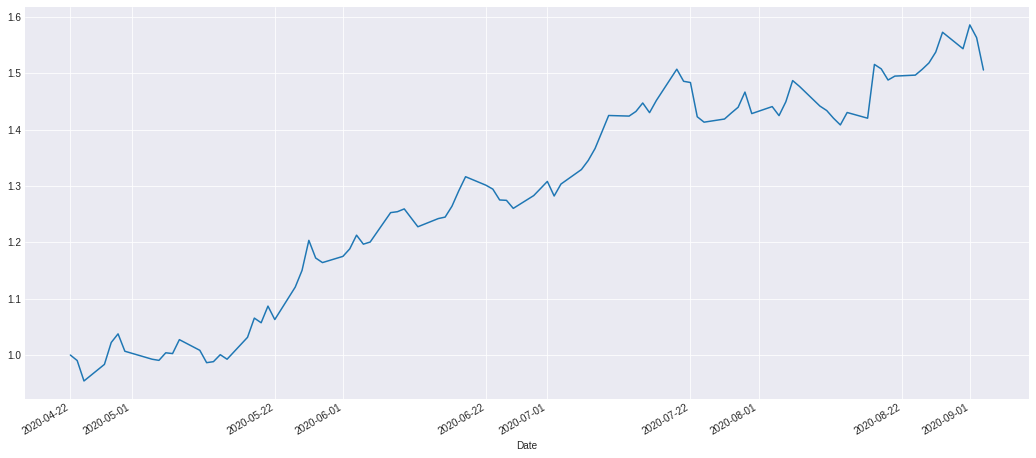

In [ ]:
carteira['vl_cota'].plot();